In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. About Python

## 2. Getting Started

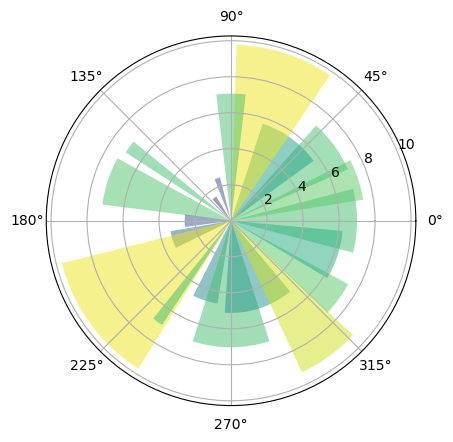

In [2]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

In [3]:
np.random.randn(3)

array([-0.12758733, -0.51931744,  0.73514322])

In [4]:
np.random.randn?

Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the
    `~numpy.random.Generator.standard_normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned array, must be non-negative.
    I

## 3. An Introductory Example

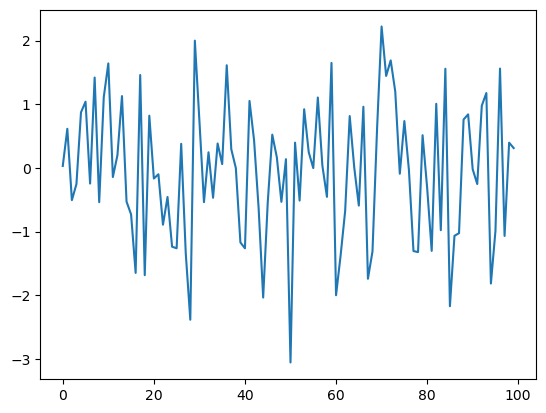

In [6]:
e_values = np.random.randn(100)
plt.plot(e_values)
plt.show()

In [7]:
np.sqrt(4)

2.0

In [8]:
np.log(4)

1.3862943611198906

In [12]:
x = []
x.pop?

Signature: x.pop(index=-1, /)
Docstring:
Remove and return item at index (default last).

Raises IndexError if list is empty or index is out of range.
Type:      builtin_function_or_method

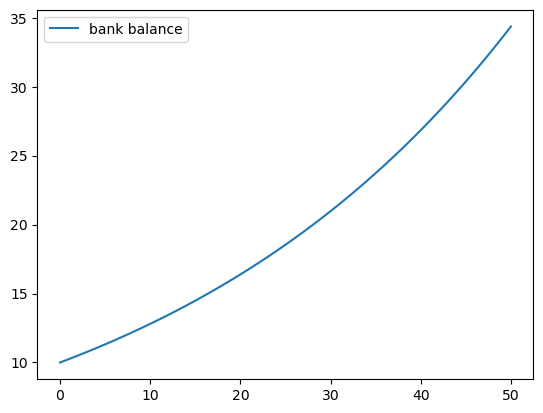

In [24]:
r = 0.025 # interest rate
T = 50 # end date
b = np.empty(T+1) # empty np array to store all of b_t
b[0] = 10

for t in range(T):
    b[t+1] = b[t]*(1 + r) 

plt.plot(b, label="bank balance")
plt.legend()
plt.show()


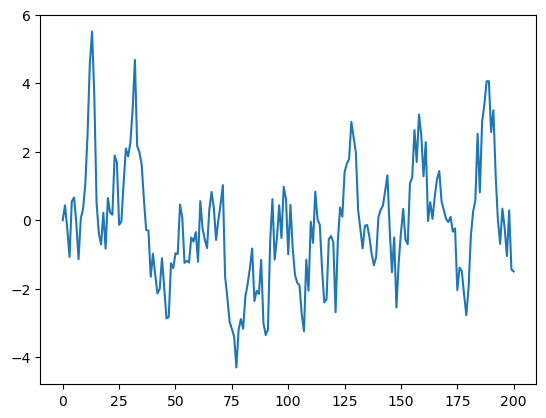

In [46]:
# Exercise 3.1

T = 200
alpha = 0.8

x = np.empty(T+1)
x[0] = 0


for t in range(T):
    x[t+1] = alpha * x[t] + np.random.randn()

plt.plot(x)
plt.show()

0.0
0.0
0.0


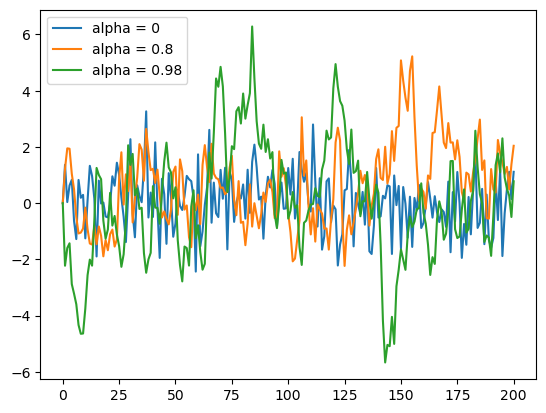

In [59]:
# Exercise 3.2

T = 200
alphas = [0, 0.8, 0.98]
x = np.empty(T+1)
x[0] = 0

for alpha in alphas:
    for t in range(T):
        x[t+1] = alpha * x[t] + np.random.randn()
    plt.plot(x, label=f"alpha = {alpha}")

plt.legend()
plt.show()

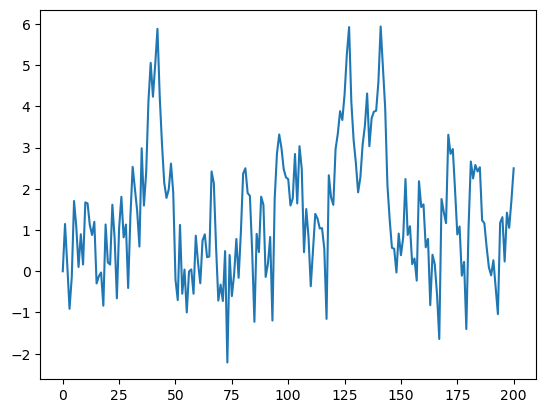

In [62]:
# Exercise 3.3

T = 200
alpha = 0.9
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    x[t+1] = alpha * np.abs(x[t]) + np.random.randn()

plt.plot(x)
plt.show()

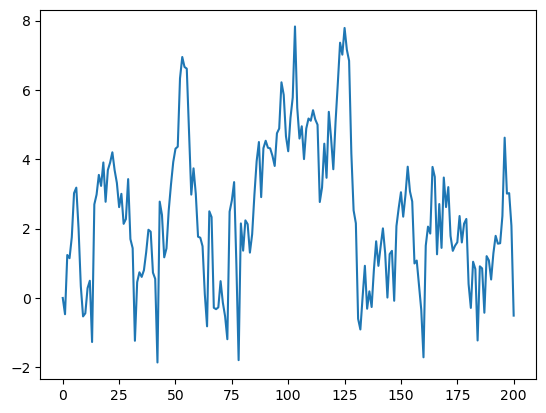

In [68]:
# Exercise 3.4


T = 200
alpha = 0.9
x = np.empty(T+1)
x[0] = 0

for t in range(T):
    abs_x = x[t] if x[t] > 0 else -x[t]
    # if x[t] < 0:
    #     abs_x = -x[t]
    # else:
    #     abs_x = x[t]
    x[t+1] = alpha * abs_x + np.random.randn()

plt.plot(x)
plt.show()

In [69]:
# Exercise 3.5
n = 1000000 # sample size for Monte Carlo simulation

count = 0
for i in range(n):

    # drawing random positions on the square
    u, v = np.random.uniform(), np.random.uniform()

    # check whether the point falls within the boundary
    # of the unit circle centred at (0.5,0.5)
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)

    # if it falls within the inscribed circle, 
    # add it to the count
    if d < 0.5:
        count += 1

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

3.14106


## 4. Functions

In [70]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)

In [71]:
max(19,20)

20

In [73]:
print('foobar')

foobar


In [74]:
str(22)

'22'

In [75]:
type(22)

int

In [76]:
bools = False, True, True 
all(bools) # True if all are True, false otherwise

False

In [77]:
any(bools) # False if all are False, true otherwise

True

In [78]:
import calendar

In [81]:
calendar.isleap(2020)

True

In [82]:
def f(x):
    return 2 * x + 1

In [83]:
f(1)

3

In [84]:
f(10)

21

In [86]:
# These are equivalent.
def f(x):
    return x**3 

f2 = lambda x: x**3


In [107]:
# Exercise 4.1
def factorial(n, f):
    n = f(n)
    fact = 1
    for t in range(n):
        fact *= n-t
    return fact

even_odd = lambda n: n**2+1 if n%2 ==0 else n**2

# def even_odd(n):
#     if n % 2 == 0:
#         return n**2 + 1
#     else:
#         return n**2

In [109]:
print(factorial(2, even_odd))

120


In [119]:
# Exercise 4.2
from numpy.random import uniform

def binomial_rv(n, p):
    count = 0
    for i in range(n):
        U = uniform()
        count +=  0 if U > p else 1
    return count

print(binomial_rv(10, .50))

3


In [120]:
# Exercise 4.3
def coin_flips1(k):
    consec_heads = 0
    for i in range(10):
        heads = binomial_rv(1, .5)
        if heads:
            consec_heads += 1
        else:
            consec_heads = 0
        if consec_heads >= k:
            return 'pay a dollar'
    return 'pay nothing'

def coin_flips2(k):
    heads = 0
    for i in range(10):
        heads = binomial_rv(1, .5)
        if heads:
            heads += 1
    if heads >= k:
        return 'pay a dollar'
    return 'pay nothing'


In [124]:
print(coin_flips1(3))
print(coin_flips2(3))

pay a dollar
pay nothing


In [127]:
# Exercise 4.4
def fib(t):
    if t == 0: return 0 
    if t == 1: return 1
    else: return fib(t-1) + fib(t-2)

print([fib(i) for i in range(10)])

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]


In [130]:
def recursive_fact(n):
    if n == 0:
        return 1
    if n == 1:
        return n
    else: return n * recursive_fact(n-1)

In [131]:
print([recursive_fact(i) for i in range(10)])

[1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880]


## 5. Python Essentials

In [136]:
# f = open('newfile.txt', 'w') # open 'newfile.txt' for writing.
# f.write("testing\n") 
# f.write("testing again\n")
# f.close()

In [137]:
# f = open('newfile.txt', 'r') 
# out = f.read()
# print(out)

testing
testing again



In [135]:
%pwd # prints the present working directory.
# If no path is specified for writing, then this iw where we would write to.

'/Users/nathanueda/VSCode/nate_notes/econometrics/quantecon/python_programming_for_economics_and_finance'

In [138]:
# # Preferred method - no close needed.
# with open('newfile.txt', 'w') as f:
#     f.write('testing\n')
#     f.write('testing again\n')

In [139]:
# with open('newfile.txt', 'r') as f:
#     out = f.read()
#     print(out)

# r: read mode
# w: write mode (overwrite)
# a: append mode (append to what is already in the file)

testing
testing again



In [140]:
# %%writefile us_cities.txt
# new york: 8244910
# los angeles: 3819702
# chicago: 2707120
# houston: 2145146
# philadelphia: 1536471
# phoenix: 1469471
# san antonio: 1359758
# san diego: 1326179
# dallas: 1223229

Writing us_cities.txt


In [141]:
countries = ('Japan', 'Korea', 'China')
cities = ('Tokyo', 'Seoul', 'Beijing')

for country, city in zip(countries, cities):
    print(f"The captial of {country} is {city}.")

The captial of Japan is Tokyo.
The captial of Korea is Seoul.
The captial of China is Beijing.


In [144]:
names = ['Tom', 'John']
marks = ['E', 'F']
dict(zip(names, marks))

{'Tom': 'E', 'John': 'F'}

In [145]:
# chaining inequalities
1 < 2 < 3

True

In [146]:
# Python programming philosophy
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [147]:
def f(x):
    """
    This function squares its argument
    """
    return x**2

In [148]:
f?

Signature: f(x)
Docstring: This function squares its argument
File:      /var/folders/y7/k0h_r9r927j3nghdzjhcr4xh0000gn/T/ipykernel_45572/238177437.py
Type:      function

In [149]:
f??

Signature: f(x)
Source:   
def f(x):
    """
    This function squares its argument
    """
    return x**2
File:      /var/folders/y7/k0h_r9r927j3nghdzjhcr4xh0000gn/T/ipykernel_45572/238177437.py
Type:      function

In [164]:
# Exercise 5.1

# part 1
x_vals = [1,2,3]
y_vals = [4, 5, 6]

dot_prod = 0
for x, y in zip(x_vals, y_vals):
    dot_prod += x*y
print(dot_prod)

# part 2
count = sum([1 if x % 2 == 0 else 0 for x in range(100)])
print(count)

# part 3
pairs = ((2,5), (4,2), (9,8), (12, 10))
both_even = sum([1 if (x[0] % 2 == 0 and x[1] % 2 == 0) else 0 for x in pairs])
print(both_even)


32
50
2


In [180]:
# Exercise 5.2
def p(x, coeff):
    # val = 0
    # for i, a in enumerate(coeff):
    #     val += x ** i * a
    # return val 

    return sum(x ** i * a for i, a in enumerate(coeff))

p(1, (2,4))

6

In [191]:
# Exercise 5.3
def num_caps(s):
    # return sum([letter == letter.upper() and letter.isalpha() for letter in s])
    return sum([letter.isupper() for letter in s])

num_caps('The Rain in Spain')

3

In [193]:
# Exercise 5.4
def seqs(seq_a, seq_b):
  return all([i in seq_b for i in seq_a])

# == test == #
print(seqs("ab", "cadb"))
print(seqs("ab", "cjdb"))
print(seqs([1, 2], [1, 2, 3]))
print(seqs([1, 2, 3], [1, 2]))

# def seqs(seq_a, seq_b):
#     return set(seq_a).issubset(set(seq_b))

True
False
True
False


In [194]:
# Exercise 5.5
def linapprox(f, a, b, n, x):
    """
    Evaluates the piecewise linear interpolant of f at x on the interval
    [a, b], with n evenly spaced grid points.

    Parameters
    ==========
        f : function
            The function to approximate

        x, a, b : scalars (floats or integers)
            Evaluation point and endpoints, with a <= x <= b

        n : integer
            Number of grid points

    Returns
    =======
        A float. The interpolant evaluated at x

    """
    length_of_interval = b - a
    num_subintervals = n - 1
    step = length_of_interval / num_subintervals

    # === find first grid point larger than x === #
    point = a
    while point <= x:
        point += step

    # === x must lie between the gridpoints (point - step) and point === #
    u, v = point - step, point

    return f(u) + (x - u) * (f(v) - f(u)) / (v - u)


In [197]:
# Exercise 5.6
e_vals = [np.random.randn() for i in range(100)]

## 6. OOP I: Objects and Names

In [204]:
x = ['foo', 'bar']
print(callable(x.append))
print(callable(x.__doc__))
print(x.__doc__)

True
False
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [206]:
x = ['a', 'b']
x.__setitem__(0, 'aa') # Equivalent to x[0] = 'aa' 
x

['aa', 'b']

In [213]:
# A namespace is a symbol table that maps names to objects in memory.

# We can look at this dictionary for math by doing the folllowing:
import math
print(math.__dict__.items())
# or
print(vars(math).items())

# two ways of doing the same thing.
print(math.__dict__['pi'] == math.pi)

# show first 10 names (the keys, not the value mappings) for math.
dir(math)[:10]



dict_items([('__name__', 'math'), ('__doc__', 'This module provides access to the mathematical functions\ndefined by the C standard.'), ('__package__', ''), ('__loader__', <_frozen_importlib_external.ExtensionFileLoader object at 0x107f0b750>), ('__spec__', ModuleSpec(name='math', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x107f0b750>, origin='/Users/nathanueda/anaconda3/lib/python3.11/lib-dynload/math.cpython-311-darwin.so')), ('acos', <built-in function acos>), ('acosh', <built-in function acosh>), ('asin', <built-in function asin>), ('asinh', <built-in function asinh>), ('atan', <built-in function atan>), ('atan2', <built-in function atan2>), ('atanh', <built-in function atanh>), ('cbrt', <built-in function cbrt>), ('ceil', <built-in function ceil>), ('copysign', <built-in function copysign>), ('cos', <built-in function cos>), ('cosh', <built-in function cosh>), ('degrees', <built-in function degrees>), ('dist', <built-in function dist>), ('erf', <built-in fun

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'acos',
 'acosh',
 'asin',
 'asinh']

In [214]:
%whos # see variables I initialized.

Variable         Type                          Data/Info
--------------------------------------------------------
T                int                           200
abs_x            float64                       2.0806262215518148
alpha            float                         0.9
alphas           list                          n=3
area_estimate    float                         0.785265
b                ndarray                       51: 51 elems, type `float64`, 408 bytes
binomial_rv      function                      <function binomial_rv at 0x117324860>
bools            tuple                         n=3
both_even        int                           2
calendar         module                        <module 'calendar' from '<...>/python3.11/calendar.py'>
cities           tuple                         n=3
city             str                           Beijing
coin_flips1      function                      <function coin_flips1 at 0x117324a40>
coin_flips2      function                    

In [215]:
def test(x):
    a = 2
    print(locals()) # prints the local variables.
    return a * x
test(1)

{'x': 1, 'a': 2}


2

In [219]:
# Exercise 6.1
print(sorted(dir(True)))
print(sorted(dir(False)))

['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'as_integer_ratio', 'bit_count', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']
['__abs__', '__add__', '__and__', '__bool__', '__cei

In [223]:
callables = []

for i in sorted(dir(True)):
    # Use eval() to evaluate a string as an expression
    if callable(eval(f'True.{i}')):
        callables.append(i)
print(callables)

['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__getstate__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'as_integer_ratio', 'bit_count', 'bit_length', 'conjugate', 'from_bytes', 'to_bytes']


## 7.5  OOP II: Building Classes

In [224]:
# Exercise 7.1
class ECDF:

    def __init__(self, observations):
        self.observations = observations

    def __call__(self, x):
        counter = 0.0
        for obs in self.observations:
            if obs <= x:
                counter += 1
        return counter / len(self.observations)
    
# == test == #

from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)

print(F(0.5))  # Evaluate ecdf at x = 0.5

F.observations = [uniform(0, 1) for i in range(1000)]

print(F(0.5))

0.4
0.498


In [225]:
# Exercise 7.2
class Polynomial:

    def __init__(self, coefficients):
        """
        Creates an instance of the Polynomial class representing

            p(x) = a_0 x^0 + ... + a_N x^N,

        where a_i = coefficients[i].
        """
        self.coefficients = coefficients

    def __call__(self, x):
        "Evaluate the polynomial at x."
        y = 0
        for i, a in enumerate(self.coefficients):
            y += a * x**i
        return y

    def differentiate(self):
        "Reset self.coefficients to those of p' instead of p."
        new_coefficients = []
        for i, a in enumerate(self.coefficients):
            new_coefficients.append(i * a)
        # Remove the first element, which is zero
        del new_coefficients[0]
        # And reset coefficients data to new values
        self.coefficients = new_coefficients
        return new_coefficients

## 8. Writing Longer Programs

## 9. Python for Scientific Computing

In [230]:
import random 
import numpy as np
import quantecon as qe

In [227]:
n = 1_000_000

In [231]:
%%time

y = 0 
for i in range(n):
    x = random.uniform(0,1)
    y += x ** 2

CPU times: user 545 ms, sys: 24 ms, total: 569 ms
Wall time: 615 ms


In [232]:
%%time
x = np.random.uniform(0,1,n)
y = np.sum(x**2) # Vectorized code (running batch operations).

CPU times: user 19.4 ms, sys: 11.4 ms, total: 30.8 ms
Wall time: 35.3 ms


## 10. NumPy

In [235]:
a = np.zeros(3)
print(type(a))
print(type(a[0]))
a

<class 'numpy.ndarray'>
<class 'numpy.float64'>


array([0., 0., 0.])

In [236]:
a = np.zeros(3, dtype=int)
print(type(a[0]))

<class 'numpy.int64'>


In [238]:
z = np.zeros(10)
print(z.shape)
z

(10,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [239]:
z.shape = (10,1)
print(z.shape)
z

(10, 1)


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [242]:
z = np.zeros((2,2))
z

array([[0., 0.],
       [0., 0.]])

In [252]:
z = np.ones((2,2))
print(z)

z = np.empty((2,2)) # garbage
print(z)

z = np.linspace(2,4,5) # from 2-4, get 5 evenly spaced values.
print(z)

z = np.identity(3)
print(z)

z = np.array([10,20]) # Creating a ndarray from python list
print(z)

z = np.array([10,20], dtype=float) # Creating a ndarray from python list
print(z)

z = np.array([[1,2], [3,4]]) # 2d array from list of list.
print(z)

[[1. 1.]
 [1. 1.]]
[[1. 1.]
 [1. 1.]]
[2.  2.5 3.  3.5 4. ]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[10 20]
[10. 20.]
[[1 2]
 [3 4]]


In [256]:
z = np.linspace(1,2,5)
print(z)

print(z[0])
print(z[0:2])
print(z[-1])

[1.   1.25 1.5  1.75 2.  ]
1.0
[1.   1.25]
2.0


In [263]:
z = np.array([[1,2], [3,4]])
print(z)

print(z[0,0])
print(z[0,1])
print(z[1,0])
print(z[1,1])
print(z[0,:]) # 0th row, every column in that row.
print(z[:,1]) # every row, in the 1st column.
z[:] = 42
print(z)

[[1 2]
 [3 4]]
1
2
3
4
[1 2]
[2 4]
[[42 42]
 [42 42]]


In [277]:
a = np.array((4,3,2,1))
a.sort()
print(a)
print(a.sum())
print(a.mean())
print(a.max())
print(a.argmax()) # index of max value.
print(a.cumsum()) # cumulative sum
print(a.cumprod()) # cumulative product
print(a.var())
print(a.std())
a.shape = (2,2)
print(a)
print(a.T)

[1 2 3 4]
10
2.5
4
3
[ 1  3  6 10]
[ 1  2  6 24]
1.25
1.118033988749895
[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [281]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
print(a+b)
print(a*b) # element wise product, not matrix wise

A = np.ones((2,2))
B = np.ones((2,2))
print(A @ B) # matrix multiplication

A = np.array((1,2))
B = np.array((10,20))
print(A @ B) # dot product



[ 6  8 10 12]
[ 5 12 21 32]
[[2. 2.]
 [2. 2.]]
50


In [283]:
# copying arrays
a = np.random.randn(3)
print(a)

b = a # b is a reference to a, not a copy
b[0] = 0
print(a)

a = np.random.rand(3)
print(a)
b = np.copy(a) # not a reference, but a copy
b[0]= 0
print(a)

[-1.61544799 -1.08423895  0.60974891]
[ 0.         -1.08423895  0.60974891]
[0.77950119 0.42548286 0.84595693]
[0.77950119 0.42548286 0.84595693]


In [285]:
A = np.array([[1,2], [3,4]])
print(np.linalg.det(A))
print(np.linalg.inv(A))

-2.0000000000000004
[[-2.   1. ]
 [ 1.5 -0.5]]


In [286]:
# Exercise 10.1
def p(x, coef):
    X = np.ones_like(coef)
    X[1:] = x
    y = np.cumprod(X)   # y = [1, x, x**2,...]
    return coef @ y

x = 2
coef = np.linspace(2, 4, 3)
print(coef)
print(p(x, coef))
# For comparison
q = np.poly1d(np.flip(coef))
print(q(x))

[2. 3. 4.]
24.0
24.0


In [287]:
# Exercise 10.2
from numpy import cumsum
from numpy.random import uniform

class DiscreteRV:
    """
    Generates an array of draws from a discrete random variable with vector of
    probabilities given by q.
    """

    def __init__(self, q):
        """
        The argument q is a NumPy array, or array like, nonnegative and sums
        to 1
        """
        self.q = q
        self.Q = cumsum(q)

    def draw(self, k=1):
        """
        Returns k draws from q. For each such draw, the value i is returned
        with probability q[i].
        """
        return self.Q.searchsorted(uniform(0, 1, size=k))

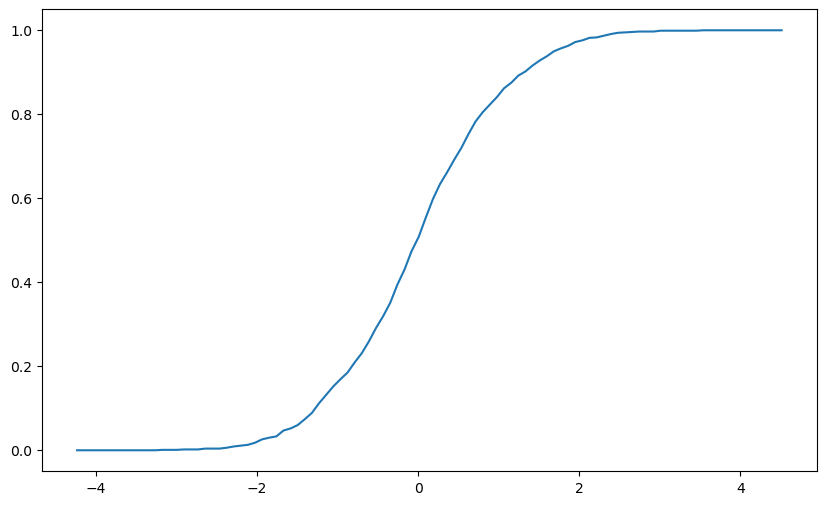

In [289]:
# Exercise 10.3
"""
Modifies ecdf.py from QuantEcon to add in a plot method

"""

class ECDF:
    """
    One-dimensional empirical distribution function given a vector of
    observations.

    Parameters
    ----------
    observations : array_like
        An array of observations

    Attributes
    ----------
    observations : array_like
        An array of observations

    """

    def __init__(self, observations):
        self.observations = np.asarray(observations)

    def __call__(self, x):
        """
        Evaluates the ecdf at x

        Parameters
        ----------
        x : scalar(float)
            The x at which the ecdf is evaluated

        Returns
        -------
        scalar(float)
            Fraction of the sample less than x

        """
        return np.mean(self.observations <= x)

    def plot(self, ax, a=None, b=None):
        """
        Plot the ecdf on the interval [a, b].

        Parameters
        ----------
        a : scalar(float), optional(default=None)
            Lower endpoint of the plot interval
        b : scalar(float), optional(default=None)
            Upper endpoint of the plot interval

        """

        # === choose reasonable interval if [a, b] not specified === #
        if a is None:
            a = self.observations.min() - self.observations.std()
        if b is None:
            b = self.observations.max() + self.observations.std()

        # === generate plot === #
        x_vals = np.linspace(a, b, num=100)
        f = np.vectorize(self.__call__)
        ax.plot(x_vals, f(x_vals))
        plt.show()

fig, ax = plt.subplots()
X = np.random.randn(1000)
F = ECDF(X)
F.plot(ax)

In [290]:
# Exercise 10.4
# part 1
np.random.seed(123)
x = np.random.randn(4, 4)
y = np.random.randn(4)

C = np.empty_like(x)
n = len(x)
for i in range(n):
    for j in range(n):
        C[i, j] = x[i, j] / y[j]

# part 2
np.random.seed(123)
x = np.random.randn(1000, 100, 100)
y = np.random.randn(100)

qe.tic()
D = np.empty_like(x)
d1, d2, d3 = x.shape
for i in range(d1):
    for j in range(d2):
        for k in range(d3):
            D[i, j, k] = x[i, j, k] / y[k]
qe.toc()

TOC: Elapsed: 0:00:6.39


6.39975118637085

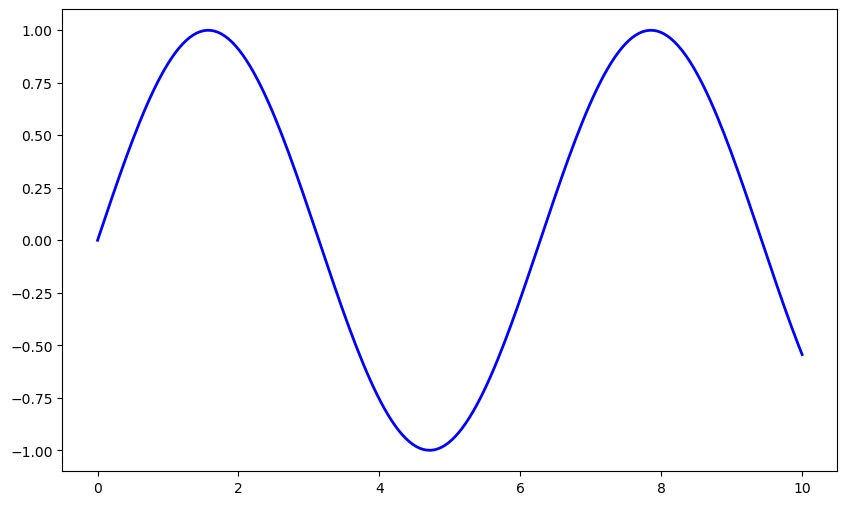

In [293]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) #set default figure size
import numpy as np

# unpythonic method
x = np.linspace(0, 10, 200)
y = np.sin(x)

plt.plot(x, y, 'b-', linewidth=2)
plt.show()

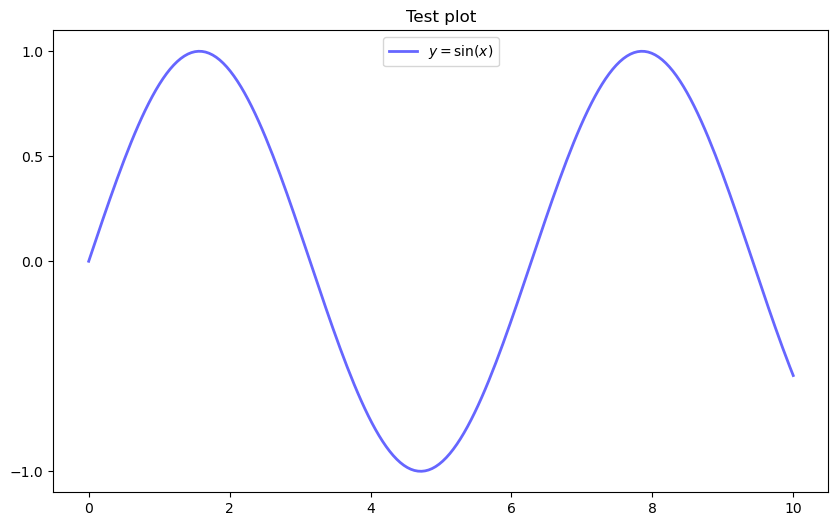

In [303]:
# pythonic oop plot
fig, ax = plt.subplots() # fig is blank cancas, ax is a frame for plotting in.
ax.plot(x, y, 'b-', label='$y=\sin(x)$', linewidth=2, alpha = 0.6)
ax.legend(loc='upper center')
ax.set_title("Test plot")
ax.set_yticks([-1, 0, .5, 1])
plt.show()

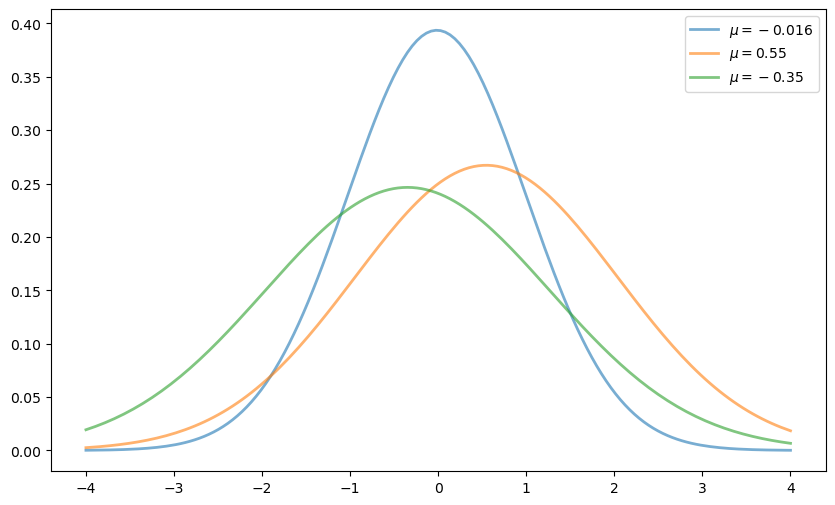

In [304]:
# multiple plots, one axis
from scipy.stats import norm
from random import uniform

fig, ax = plt.subplots()
x = np.linspace(-4, 4, 150)
for i in range(3):
    m, s = uniform(-1, 1), uniform(1, 2)
    y = norm.pdf(x, loc=m, scale=s)
    current_label = f'$\mu = {m:.2}$'
    ax.plot(x, y, linewidth=2, alpha=0.6, label=current_label)
ax.legend()
plt.show()

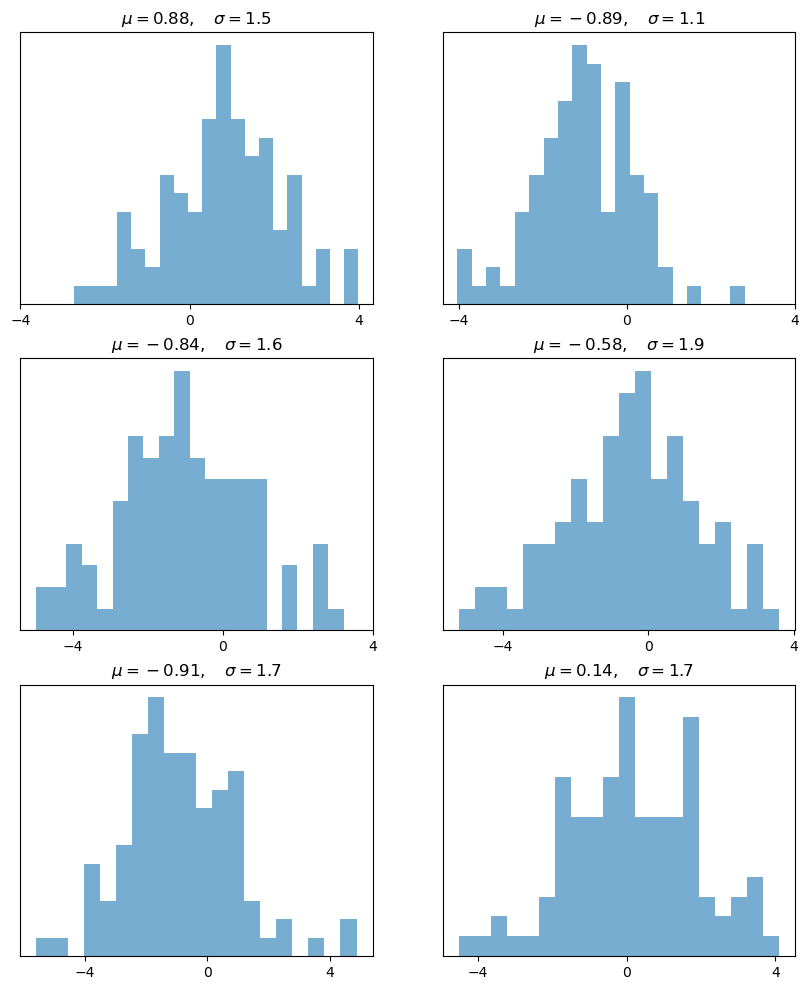

In [305]:
# multiple subplots
num_rows, num_cols = 3, 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 12))
for i in range(num_rows):
    for j in range(num_cols):
        m, s = uniform(-1, 1), uniform(1, 2)
        x = norm.rvs(loc=m, scale=s, size=100)
        axes[i, j].hist(x, alpha=0.6, bins=20)
        t = f'$\mu = {m:.2}, \quad \sigma = {s:.2}$'
        axes[i, j].set(title=t, xticks=[-4, 0, 4], yticks=[])
plt.show()

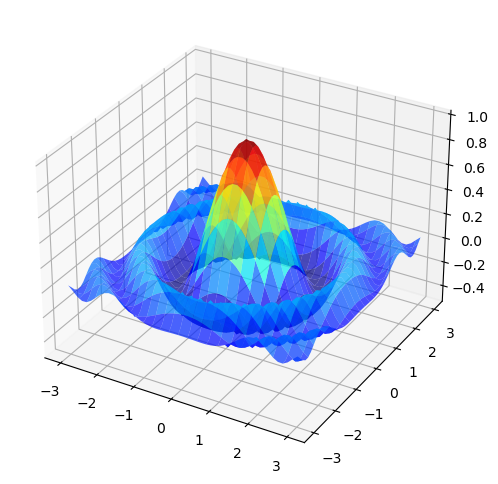

In [307]:
# 3d plots
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm


def f(x, y):
    return np.cos(x**2 + y**2) / (1 + x**2 + y**2)

xgrid = np.linspace(-3, 3, 50)
ygrid = xgrid
x, y = np.meshgrid(xgrid, ygrid)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,
                y,
                f(x, y),
                rstride=2, cstride=2,
                cmap=cm.jet,
                alpha=0.7,
                linewidth=0.25)
ax.set_zlim(-0.5, 1.0)
plt.show()

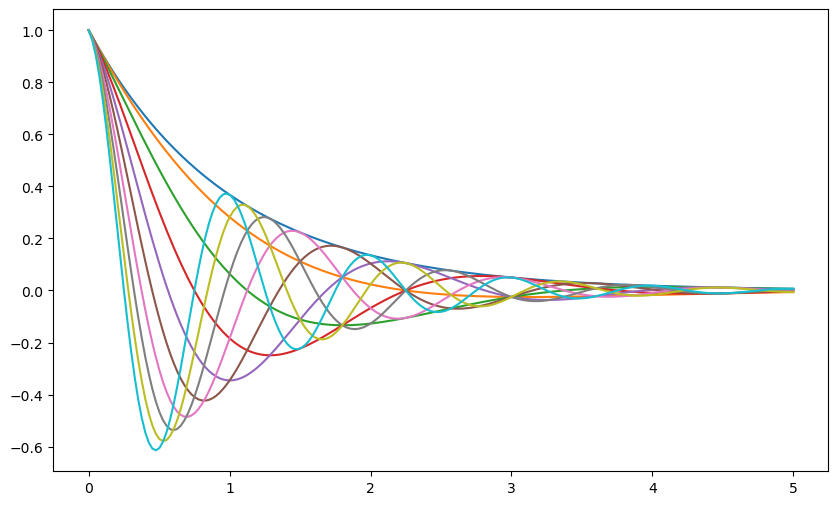

In [308]:
# Exercise 11.1
def f(x, θ):
    return np.cos(np.pi * θ * x ) * np.exp(- x)

θ_vals = np.linspace(0, 2, 10)
x = np.linspace(0, 5, 200)
fig, ax = plt.subplots()

for θ in θ_vals:
    ax.plot(x, f(x, θ))

plt.show()

In [309]:
import numpy as np

np.random.beta(5,5, size = 3)

array([0.48763807, 0.45233273, 0.48759032])

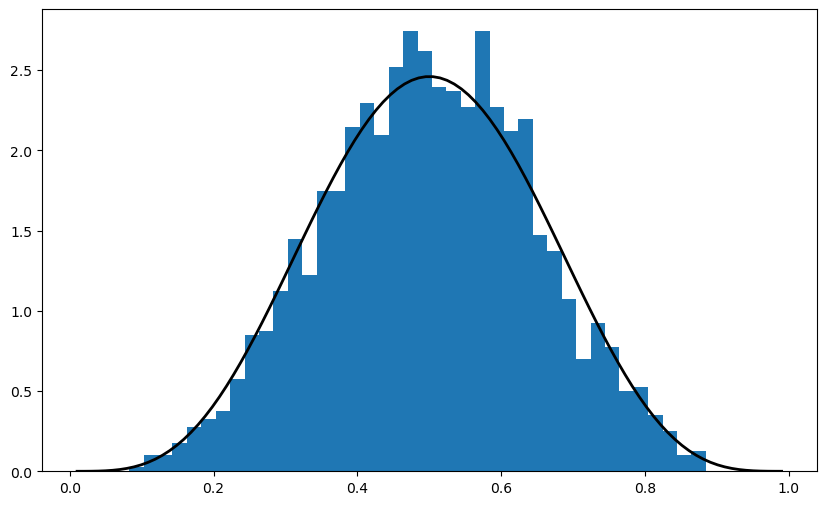

In [310]:
%matplotlib inline
from scipy.stats import beta
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, density=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2)
plt.show()

In [311]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
import requests

In [320]:
s = pd.Series(np.random.randn(4), name='daily returns')
print(s)
print(s*100)
print(s.describe())
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
print(s)
print(s['AMZN'])
print('AAPL' in s)

0    0.793237
1    0.362214
2    2.168584
3    0.935660
Name: daily returns, dtype: float64
0     79.323740
1     36.221404
2    216.858429
3     93.566047
Name: daily returns, dtype: float64
count    4.000000
mean     1.064924
std      0.775111
min      0.362214
25%      0.685482
50%      0.864449
75%      1.243891
max      2.168584
Name: daily returns, dtype: float64
AMZN    0.793237
AAPL    0.362214
MSFT    2.168584
GOOG    0.935660
Name: daily returns, dtype: float64
0.7932374007416976
True


In [326]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
print(type(df))
display(df)
display(df[2:5]) # rows 2, 3, 4
display(df[['country', 'tcgdp']]) # retrieving columns 'country' and 'tcgdp'
display(df.iloc[2:5, 0:4]) # using integer indexing to get rows 2,3,4, cols 0, 1, 2, 3


<class 'pandas.core.frame.DataFrame'>


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


In [336]:
display(df.loc[df.index[2:5], ['country', 'tcgdp']]) # locate by name: rows 2, 3, 4, cols 'country and 'tcgdp'
display(df[df['POP'] >= 20000]) # get all rows where 'POP' col >= 20000
display(df.query("POP >= 20000")) # the above is equivalent to 
display(df[(df['country'].isin(['Argentina', 'India', 'South Africa'])) & (df.POP > 40000)])
display(df.query("country in ['Argentina', 'India', 'South Africa'] and POP > 40000"))
display(df[(df.cc + df.cg >= 80) & (df.POP <= 20000)])
display(df.loc[df.cc == max(df.cc)])

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
4,Malawi,MWI,2000,11801.505,59.543808,5026.221784,74.707624,11.658954
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.978740,5.108068


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.97874,5.108068


In [337]:
df_subset = df[['country', 'POP', 'tcgdp']]
display(df_subset)

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [339]:
# apply applies a function to each row/column and returns a series
# axis = 0: apply to each column (variables)
# axis = 1: apply to eaech row (observations)
# axis = 0 is default
display(df[['year', 'POP', 'XRAT', 'tcgdp', 'cc', 'cg']].apply(max)) # getting max value in these cols
display(df.apply(lambda row: row, axis=1)) # trivial, just returning df.

year     2.000000e+03
POP      1.006300e+06
XRAT     5.954381e+01
tcgdp    9.898700e+06
cc       7.897874e+01
cg       1.407221e+01
dtype: float64

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [341]:
# Exercise 13.1
import datetime as dt
import yfinance as yf

ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'C': 'Citigroup',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google'}

def read_data(ticker_list,
          start=dt.datetime(2021, 1, 1),
          end=dt.datetime(2021, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        stock = yf.Ticker(tick)
        prices = stock.history(start=start, end=end)

        # Change the index to date-only
        prices.index = pd.to_datetime(prices.index.date)
        
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

In [344]:
ticker

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,C,QCOM,KO,GOOG
2021-01-04,45.504311,211.996597,102.397308,54.710884,153.289993,127.164154,159.331497,53.625774,139.010666,48.158409,86.412003
2021-01-05,46.365482,212.201111,104.214920,56.457409,153.399994,128.736389,160.925507,55.016796,142.689529,47.628998,87.045998
2021-01-06,46.814388,206.698883,106.817398,58.252678,153.529999,124.402924,156.919006,58.182270,141.528748,46.113789,86.764503
2021-01-07,47.812965,212.580917,106.569534,59.446812,152.669998,128.647964,158.108002,58.868862,145.750565,45.602627,89.362503
2021-01-08,47.318260,213.876160,106.189491,59.674267,152.850006,129.758347,159.134995,58.289268,146.630478,46.624947,90.360497
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,48.225639,328.668732,118.568832,48.675224,183.779999,174.288635,171.068497,55.327625,174.215637,54.817585,147.142502
2021-12-27,48.817768,336.289124,119.467415,48.975792,185.899994,178.292877,169.669495,55.731953,177.638168,55.222454,148.063995
2021-12-28,48.648586,335.110718,120.384171,48.431526,184.750000,177.264618,170.660995,55.704380,176.198608,55.439011,146.447998
2021-12-29,48.714382,335.798187,121.037689,48.910801,183.679993,177.353622,169.201004,55.630871,177.514252,55.504925,146.504501


In [345]:
change = ticker.pct_change(periods=len(ticker)-1, axis='rows')*100
price_change = change.iloc[-1]
price_change

INTC     6.868529
MSFT    57.179624
IBM     18.700376
BHP    -10.527097
TM      20.086118
AAPL    38.550774
AMZN     5.845049
C        3.550552
QCOM    25.318536
KO      14.922502
GOOG    68.960906
Name: 2021-12-30 00:00:00, dtype: float64

/var/folders/y7/k0h_r9r927j3nghdzjhcr4xh0000gn/T/ipykernel_45572/232489783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_change.sort_values(inplace=True)


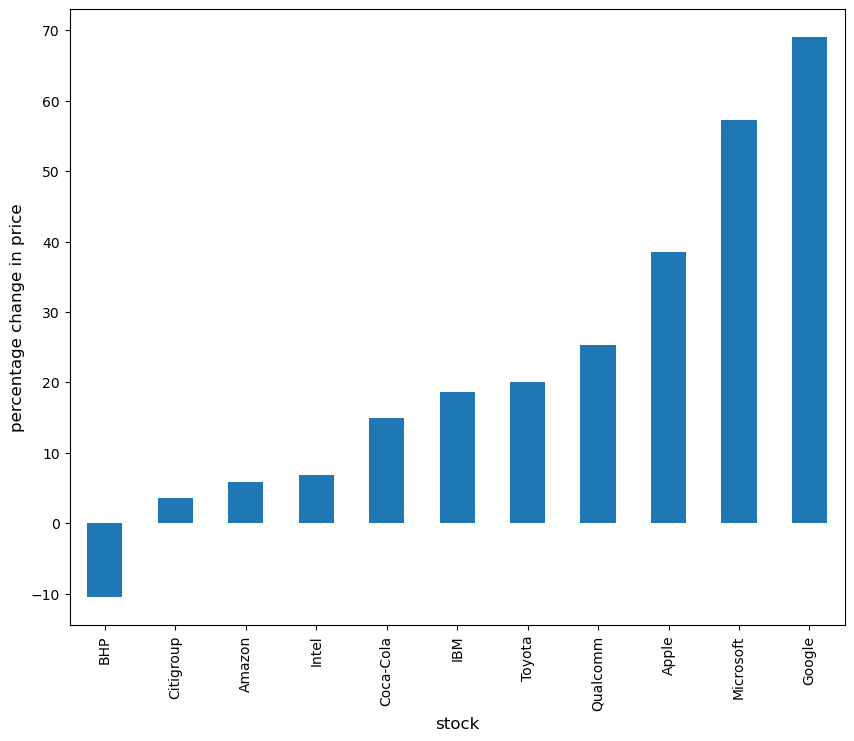

In [346]:
price_change.sort_values(inplace=True)
price_change = price_change.rename(index=ticker_list)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('stock', fontsize=12)
ax.set_ylabel('percentage change in price', fontsize=12)
price_change.plot(kind='bar', ax=ax)
plt.show()

In [347]:
# Exercise 13.2

indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

In [348]:
from sympy import *
from sympy.plotting import plot, plot3d_parametric_line, plot3d
from sympy.solvers.inequalities import reduce_rational_inequalities
from sympy.stats import Poisson, Exponential, Binomial, density, moment, E, cdf

import numpy as np
import matplotlib.pyplot as plt

# Enable the mathjax printer
init_printing(use_latex='mathjax')

In [349]:
x, y, z = symbols('x y z')

In [350]:
expr = (x+y) ** 2
expr

       2
(x + y) 

In [351]:
expand_expr = expand(expr)
expand_expr

 2            2
x  + 2⋅x⋅y + y 

In [352]:
factor(expand_expr)

       2
(x + y) 

In [353]:
solve(expr)

[{x: -y}]